<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Lucas Liaño

***
## Muestreo de señales - Fourier


<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [78]:
def mySignalGenerator (sType ='sin',param =(1, 1) ,fs = 1000, N = 1000, optionalParam=(0, 0)):
    Ts = 1/fs
    t = np.arange(0, N*Ts, Ts)
    
    if sType == 'sin':
        # Senoidal (fo=1, Ao=1)
        # optionalParam (phi=0, dc=0)
        #print("Senoidal")
        fo = param[0]
        Ao = param[1]
        phi = optionalParam[0]
        dc = optionalParam[1]
        
        f = Ao * (np.sin(2 * np.pi * fo * t + phi)) + dc
        return t,f
        
    elif sType == 'n':
        # Ruido blanco (u,std)
        # optionalParam (none,none)
        #print("White Noise")
        u = param[0]
        std = param[1]
        f = np.random.normal(u, std, size=N)
        return t, f
        
        
    elif sType == 't':
        # Triangular (To, Ao)
        # optionalParam (none,none)
        #print("Triangular")
        To = param[0]
        Ao = param[1]
        f = Ao/2 * signal.sawtooth(2 * np.pi * 1/To * t) + Ao/2
        return t, f
        
    elif sType == 'sq':
        # Cuadrada (To, Ao)
        # optionalParam = (none, none)
        #print("Square")
        To = param[0]
        Ao = param[1]
        f = Ao/2 * signal.square(2 * np.pi * 1/To *t) + Ao/2
        
        
        return t, f
    
    else:
        raise ValueError("El argumento sType debe ser 'sin','n','t' o 'sq'.")
        


a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [79]:
# Módulos del programa
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as signal
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Insertar aquí el código para inicializar tu notebook
########################################################


In [80]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz
W = fs / (N) #Resolución espectral

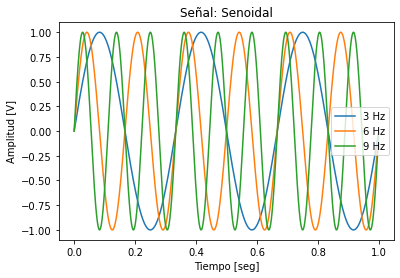

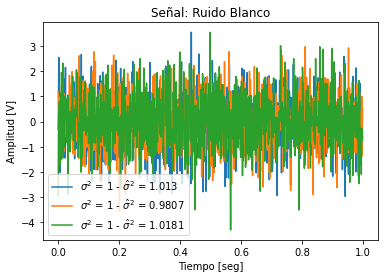

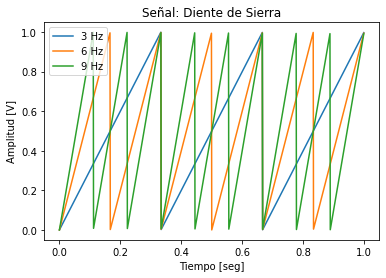

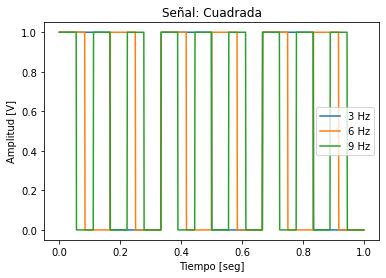

In [81]:
##############################################
# En esta celda evaluo el generador de señales
##############################################
# Senoidal
t1,f1 = mySignalGenerator ('sin',(3, 1) ,fs, N, (0, 0));
t2,f2 = mySignalGenerator ('sin',(6, 1) ,fs, N, (0, 0));
t3,f3 = mySignalGenerator ('sin',(9, 1) ,fs, N, (0, 0));
# Ruido
t4,f4 = mySignalGenerator ('n',(0, 1) ,fs, N, (0, 0));
t5,f5 = mySignalGenerator ('n',(0, 1) ,fs, N, (0, 0));
t6,f6 = mySignalGenerator ('n',(0, 1) ,fs, N, (0, 0));
# Cuadrada
t7,f7 = mySignalGenerator ('t',(1/3, 1) ,fs, N, (0, 0));
t8,f8 = mySignalGenerator ('t',(1/6, 1) ,fs, N, (0, 0));
t9,f9 = mySignalGenerator ('t',(1/9, 1) ,fs, N, (0, 0));
# Diente de Sierra
t10,f10 = mySignalGenerator ('sq',(1/3, 1) ,fs, N, (0, 0));
t11,f11 = mySignalGenerator ('sq',(1/6, 1) ,fs, N, (0, 0));
t12,f12 = mySignalGenerator ('sq',(1/9, 1) ,fs, N, (0, 0));

# Graficamos
# Senoidal
fig, ax1 = plt.subplots(1,1)  
ax1.plot(t1, f1, label='3 Hz')  
ax1.plot(t2, f2, label='6 Hz')
ax1.plot(t3, f3, label='9 Hz')
ax1.set_xlabel('Tiempo [seg]')  
ax1.set_ylabel('Amplitud [V]')  
ax1.set_title("Señal: Senoidal") 
ax1.legend()  
# Ruido
fig, ax1 = plt.subplots(1,1)  
ax1.plot(t4, f4, label= '$\sigma^2$ = 1 - $\hat{\sigma}^2$ = '+str( round( np.std(f4),4) ))  
ax1.plot(t5, f5, label= '$\sigma^2$ = 1 - $\hat{\sigma}^2$ = '+str( round( np.std(f5),4) ))
ax1.plot(t6, f6, label= '$\sigma^2$ = 1 - $\hat{\sigma}^2$ = '+str( round( np.std(f6),4) ))
ax1.set_xlabel('Tiempo [seg]')  
ax1.set_ylabel('Amplitud [V]')  
ax1.set_title("Señal: Ruido Blanco") 
ax1.legend()  
# Diente de Sierra
fig, ax1 = plt.subplots(1,1)  
ax1.plot(t7, f7, label='3 Hz')  
ax1.plot(t8, f8, label='6 Hz')
ax1.plot(t9, f9, label='9 Hz')
ax1.set_xlabel('Tiempo [seg]')  
ax1.set_ylabel('Amplitud [V]')  
ax1.set_title("Señal: Diente de Sierra") 
ax1.legend()  
# Cuadrada
fig, ax1 = plt.subplots(1,1)  
ax1.plot(t10, f10, label='3 Hz')  
ax1.plot(t11, f11, label='6 Hz')
ax1.plot(t12, f12, label='9 Hz')
ax1.set_xlabel('Tiempo [seg]')  
ax1.set_ylabel('Amplitud [V]')  
ax1.set_title("Señal: Cuadrada") 
ax1.legend()  

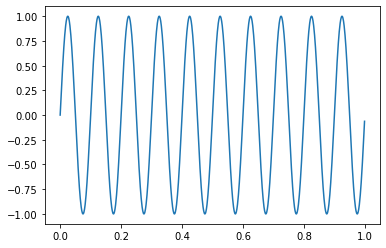

In [82]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
t1,f1 = mySignalGenerator('sin', (f0, a0) ,fs ,N ,(p0, 0));
plt.plot(t1,f1)

¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si. Para ello es necesario medir cual es el periodo, es decir cada cuanto se repite la señal. 
</div>

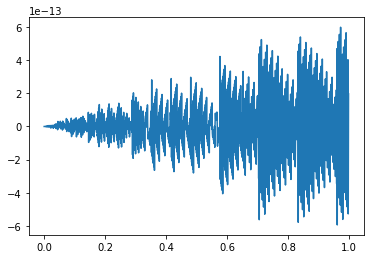

In [83]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2# Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
t2,f2 = mySignalGenerator('sin',(f0, a0) ,fs ,N ,(p0, 0));
plt.plot(t2,f2)

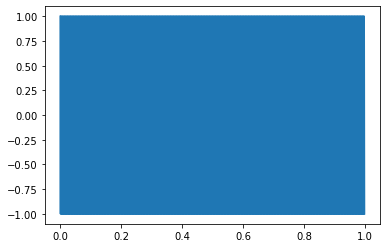

In [84]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
t3,f3 = mySignalGenerator('sin',(f0, a0) ,fs ,N ,(p0, 0));
plt.plot(t3,f3)

¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En estos casos no es posible calcularlos mediante el mismo método.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En ambos casos no es posible conocer nada sobre la función mediante el gráfico dado que la representación visual de la señal no es de fácil comprensión. En el primer caso, el fenómeno se da por estar trabajando sobre una señal que esta siendo muestreada con una frecuencia igual a la de Nysquit, y se trabaja con una fase nula. Esto tiene una implicancia negativa en la resolución a bajo nivel de la función, por ello se muestra esa señal en forma de arbolito. 
    En el caso de la segunda señal, vemos que la señal solamente consta de picos y valles.
</div>

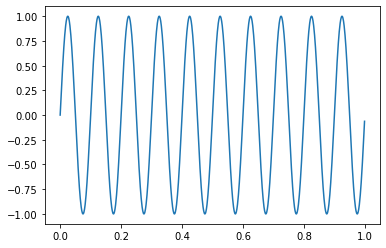

In [85]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs +10 # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
t4,f4 = mySignalGenerator('sin',(f0, a0) ,fs ,N ,(p0, 0));
plt.plot(t4,f4)

¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> No podemos diferenciar estas señales en una grafica en función del tiempo. Esto se debe a que nosotros solo podemos visualizar valores que en el dominio frecuencial se encuentren entre $0$ y $f_{s}$. Ambas señales tienen una delta de Kronecker en $\omega = 10$, una debido a que es su frecuencia real (a.1) y la otra debido al efecto del muestreo (a.4).
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Esto se puede solucionar analizando ambas señales en el dominio de la frecuencia. *VER SI ESTA BIEN ESTO*.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

In [86]:
def mi_analizador(f, N, W = 1, plotting = False, nombre='f(t)', colorTrazo = 'b', escala = 'a'):
    k = np.arange(0,N).astype(int)      #Calculamos la base temporal discreta

    Fk = np.zeros(N).astype(complex)    #Generamos un vector vacio con la salida
    
    Wkn = np.zeros([k.size,k.size], dtype = complex)    #k va de 0 a N-1 y n lo mismo
   
    index = 0
    for kloop in k:
        Wkn[:,kloop] = np.exp( -1j * (2*np.pi/N) * kloop * k)
        index += 1
    
    Fk = np.matmul(Wkn,f)
    
    Fkk = Fk[:int(N/2)] * (1/N) # Recortamos la señal hasta fs/2 y la escalamos en (2/N)
    kk = k[:int(N/2)]          # También recortamos la base temporal
    
    if (escala == 'a'): # Si queremos que coincida la amplitud 
        Fkk = Fkk * 2
    elif (escala == 'p'): # Si queremos que coincida la potencia en tiempo con la pot en w
        Fkk = Fkk * np.sqrt(2)
    
    if plotting == True:
        
        fig, axs = plt.subplots(2,2)
                      
        axs[0,0].plot(kk*W, np.abs(Fkk), label = nombre, color= colorTrazo)  
        axs[0,0].set_xlabel('Frecuencia [k*W]')  
        axs[0,0].set_ylabel('Amplitud [V]')  
        axs[0,0].set_title("Módulo") 
        axs[0,0].legend()
                      
        axs[0,1].plot(kk*W, np.angle(Fkk), label = nombre, color= colorTrazo)  
        axs[0,1].set_xlabel('Frecuencia [k*W]')  
        axs[0,1].set_ylabel('Amplitud [V]')  
        axs[0,1].set_title("Fase") 
        axs[0,1].legend()
        
        # axs[1,0].plot(kk*W, np.real(Fkk), label = nombre, color= colorTrazo)  
        # axs[1,0].set_xlabel('Frecuencia [k*W]')  
        # axs[1,0].set_ylabel('Amplitud [V]')  
        # axs[1,0].set_title("Parte Real") 
        # axs[1,0].legend()
        
                      
        # axs[1,1].plot(kk*W, np.imag(Fkk), label = nombre, color= colorTrazo)  
        # axs[1,1].set_xlabel('Frecuencia [k*W]')  
        # axs[1,1].set_ylabel('Amplitud [V]')  
        # axs[1,1].set_title("Parte Imaginaria") 
        # axs[1,1].legend()
    
    return k, Fk, kk, Fkk

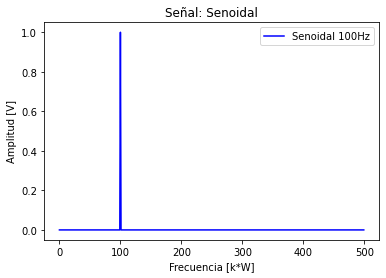

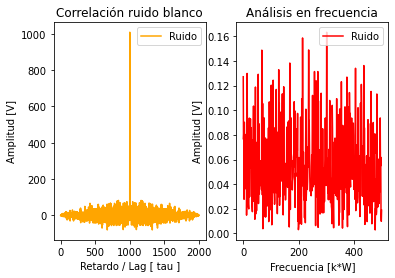

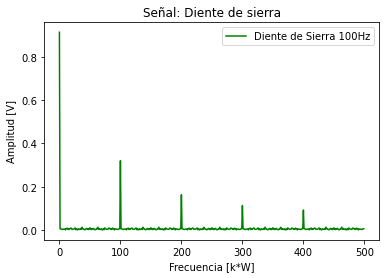

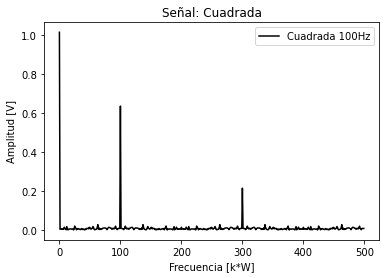

In [87]:
# Senoidal 3Hz
t1,f1 = mySignalGenerator ('sin',(100, 1) ,fs, N, (0, 0));
k1, Fk1, kk1, Fkk1 = mi_analizador(f1, N, W);
# Plot
fig, ax1 = plt.subplots(1,1)  
ax1.plot(kk1*W, np.abs(Fkk1), label='Senoidal 100Hz', color='b')  
ax1.set_xlabel('Frecuencia [k*W]')  
ax1.set_ylabel('Amplitud [V]')  
ax1.set_title("Señal: Senoidal") 
ax1.legend() 

#============================
# Ruido 
t2,f2 = mySignalGenerator ('n',(0, 1) ,fs, N, (0, 0));
k2, Fk2, kk2, Fkk2 = mi_analizador(f2, N, W);
# Plot
fig, (ax5,ax2) = plt.subplots(1,2)
#ax5.plot(t2 - N/(2*fs), np.correlate(f2,f2,'full'), label='Ruido', color='orange')  #Hay que escalar esto. 
ax5.plot(np.correlate(f2,f2,'full'), label='Ruido', color='orange')  #Hay que escalar esto. 

ax5.set_xlabel('Retardo / Lag [ tau ]')  
ax5.set_ylabel('Amplitud [V]')  
ax5.set_title("Correlación ruido blanco") 
ax5.legend() 
ax2.plot(kk2*W, np.abs(Fkk2), label='Ruido', color='r')  #Hay que escalar esto. 
ax2.set_xlabel('Frecuencia [k*W]')  
ax2.set_ylabel('Amplitud [V]')  #Debería ser sigma^2/N porque el area en t es sigma^2 y la base es N.
ax2.set_title("Análisis en frecuencia") 
ax2.legend()

#============================
# Diente de Sierra 3Hz
t3,f3 = mySignalGenerator ('t',(1/100, 1) ,fs, N, (0, 0));
k3, Fk3, kk3, Fkk3 = mi_analizador(f3, N, W);
# Plot
fig, ax3 = plt.subplots(1,1)
ax3.plot(kk3*W, np.abs(Fkk3), label='Diente de Sierra 100Hz', color='g')  
ax3.set_xlabel('Frecuencia [k*W]')  
ax3.set_ylabel('Amplitud [V]')  
ax3.set_title("Señal: Diente de sierra") 
ax3.legend()

#============================
# Cuadrada 3Hz
t4,f4 = mySignalGenerator ('sq',(1/100, 1) ,fs, N, (0, 0));
k4, Fk4, kk4, Fkk4 = mi_analizador(f4, N, W);
# Plot
fig, ax4 = plt.subplots(1,1)
ax4.plot(kk4*W, np.abs(Fkk4), label='Cuadrada 100Hz', color='k')
ax4.set_xlabel('Frecuencia [k*W]')  
ax4.set_ylabel('Amplitud [V]')  
ax4.set_title("Señal: Cuadrada") 
ax4.legend()


<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [88]:
import timeit

the_start = timeit.timeit()
print("hello")
the_end = timeit.timeit()
print(the_start - the_end)


hello
-0.012446900000213645


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [89]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['--'], 
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   ['']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,--
16,
32,
64,
128,
256,
512,
1024,
2048,


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(N/4) \lvert$,$ \lvert X(N/4+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f_i \neq N/4$
$f_S/4$,1,2.42566e-14,0
$f_S/4+0.01$,0.999834,0.0101014,0.000328943
$f_S/4+0.25$,0.899609,0.300813,0.189701
$f_S/4+0.5$,0.636618,0.636624,0.594718


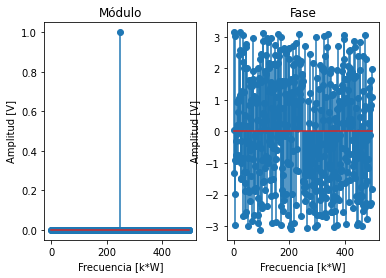

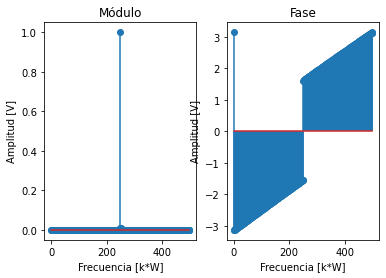

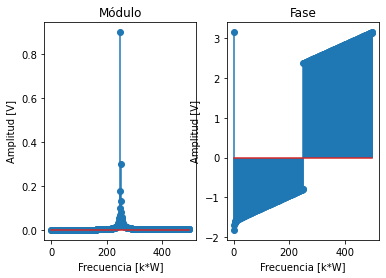

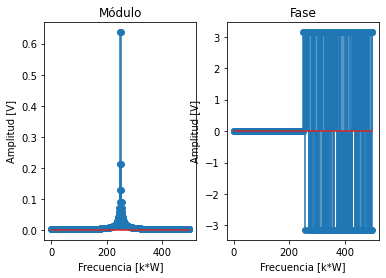

In [90]:
#######################################
# Tu simulación que genere resultados #
#######################################

# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$ \lvert X(N/4) \lvert$', '$ \lvert X(N/4+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   [''                       , ''                          , '$F:f_i \neq N/4$'                       ] 
                 ]

# Inicializamos la entidad loopeable.
fd = (0, 0.01, 0.25, 0.5)

W = fs/N


for each in fd:
    foL = fs/4 + each
    tL,fL = mySignalGenerator ('sin',(foL, 1), fs, N, (0, 0));
    kL, FkL, kkL, FkkL = mi_analizador(fL, N, W);
    
    fig, axs = plt.subplots(1,2)
                      
    axs[0].stem(kkL* W, np.abs(FkkL), use_line_collection = True) 
    axs[0].set_xlabel('Frecuencia [k*W]')  
    axs[0].set_ylabel('Amplitud [V]')  
    axs[0].set_title("Módulo") 
                  
    axs[1].stem(kkL* W, np.angle(FkkL), use_line_collection = True)
    axs[1].set_xlabel('Frecuencia [k*W]')  
    axs[1].set_ylabel('Amplitud [V]')  
    axs[1].set_title("Fase") 
    
    # Nota: Voy a escalar todas las componentes en 2/N para que me quede representada la energía
    # Nota importante : Como en este caso tenemos fs = N, podemos hacer N/4 y vamos a tener el valor de la frecuencia de interes
    # Nota importante2: No vamos a poder pedir el valor de Fk(fs/4 + fd) porque la resolución espectral no lo permite. 
    tus_resultados.append([ (np.abs(FkkL[int( N/4)    ]) ), 
                            (np.abs(FkkL[int( N/4) + 1]) ),
                            ((np.sum(np.abs(FkkL)**2) - (np.abs(FkkL[int( N/4)])**2)))  
                          ])
    
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
    
HTML(df.to_html())

<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

,Frecuencia central,Primer adyacente,Resto de frecuencias
$M_j$ \ expr. matemática,$ \lvert X(N/4) \lvert$,$ \lvert X(N/4 + 1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq N/4$
0,0.636618,0.636624,0.594718
$N/10$,0.00818561,0.0109409,0.909024
$N$,0.00140795,8.75876e-16,0.499998
$10N$,0.000119909,0.000154051,0.0909091


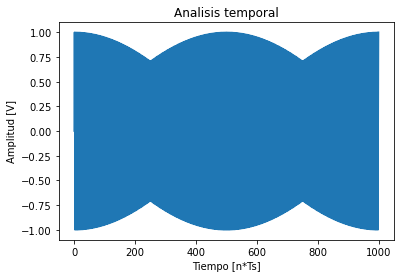

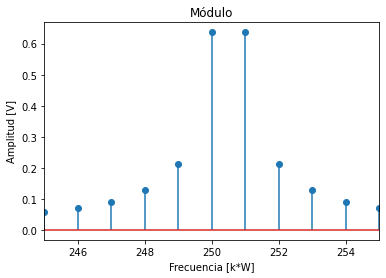

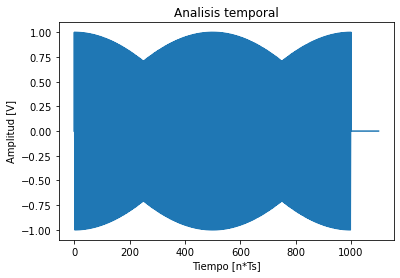

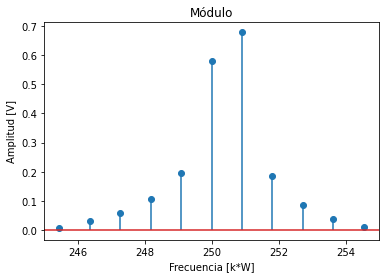

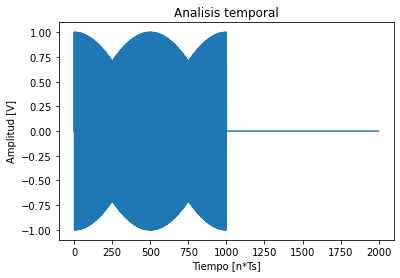

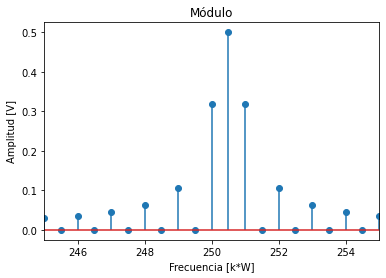

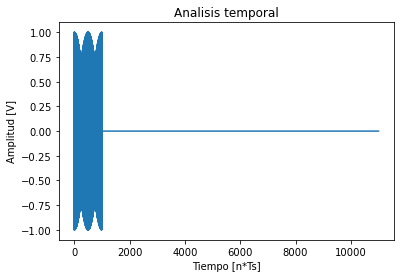

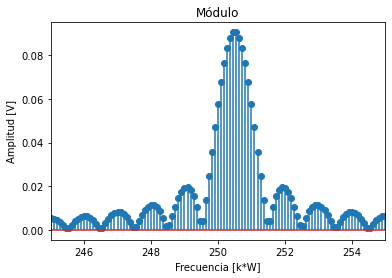

In [91]:
# Inserte aquí su código
tus_resultados = [ ['$ \lvert X(N/4) \lvert$', '$ \lvert X(N/4 + 1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   [''                       , ''                          , '$F:f \neq N/4$'                       ] 
                 ]

# Inicializamos la entidad loopeable.
Mj = (0, N/10, N, 10*N)

for each in Mj:
    foL = fs/4 + 0.5
    W = fs/(N+each)
    tL,fL = mySignalGenerator ('sin',(foL, 1), fs, N, (0, 0));
    
    fL = np.pad(fL, (0, int(each)), mode='constant', constant_values = (0,0))    #Add zero padding
    
    kL, FkL, kkL, FkkL = mi_analizador(fL, int(N+each), W);
    
    fig, axs = plt.subplots(1)
                      
    axs.plot(fL) 
    axs.set_xlabel('Tiempo [n*Ts]')  
    axs.set_ylabel('Amplitud [V]')  
    axs.set_title("Analisis temporal") 
                  
    fig, axs = plt.subplots(1)
                      
    axs.stem(kkL* W, np.abs(FkkL), use_line_collection = True) 
    axs.set_xlabel('Frecuencia [k*W]')  
    axs.set_xlim(N/4 - 5, N/4 + 5)
    axs.set_ylabel('Amplitud [V]')  
    axs.set_title("Módulo") 
                  
 
    tus_resultados.append([ (np.abs(FkkL[int( N/4)    ]) ), 
                            (np.abs(FkkL[int( N/4) + 1]) ),
                            (np.sum(np.abs(FkkL)**2) - (np.abs(FkkL[int( N/4)])**2))   
                          ])
    
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$M_j$ \ expr. matemática', 
                      '',
                      '0', 
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si. Al aumentar la cantidad de muestras la resolución espectral ha disminuido. 
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El efecto en escencia es el mismo. Al aumentar la resolución espectral podemos observar correctamente la forma del kernel de Dirichlet que ha sido convolucionado con el espectro de nuestra señal inicial. No está de más aclarar que al hacer zero padding lo que estamos intentando de ver es la forma del espectro convolucionado continuo, por tanto los valores de amplitud **NO** nos sirven como referencia de los valores reales de la señal. Esto lo podemos observar en la tabla del inicio.
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [92]:
#######################################
# Tu simulación que genere resultados #
#######################################
tus_resultados = []

# Inicializamos la entidad loopeable.
Mj = (0, N/10, N, 10*N)
foL = fs/4 + 0.5

for each in Mj:
    W = fs/(N+each)
    tL,fL = mySignalGenerator ('sin',(foL, 1), fs, N, (0, 0));
    
    fL = np.pad(fL, (0, int(each)), mode='constant', constant_values = (0,0))    #Add zero padding
    
    kL, FkL, kkL, FkkL = mi_analizador(fL, int(N+each), W);
                      
    tus_resultados.append([ (foL - (np.argmax(FkkL)*W) ) * (100/foL) ])
    

df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,0.199601
$N/10$,0.199601
$N$,0.199601
$10N$,0.163310


<div class="alert alert-block alert-warning">
<b>Nota:</b> Si bien vemos que el error porcentual disminuye a medida que agregamos padding, me llama la atención porque no se hace visible dicho error para los valores de $N/10$ y $N$. Creo que los cálculos estan bien.
   
</div>

<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1,1,9
,,,
simulación,1,1,9


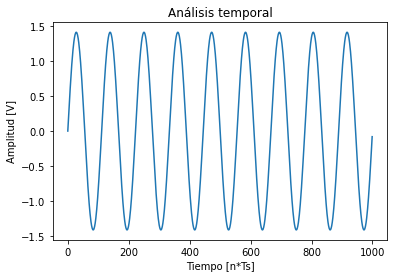

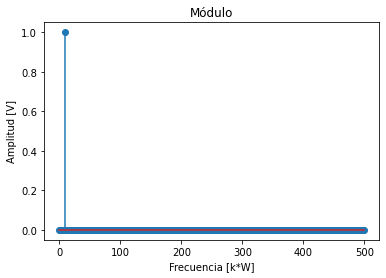

In [93]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                    ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                    [ '', '','']
                  ]
tus_resultados.append(['1', '1', '9'])
tus_resultados.append([ '', '',''])



W = fs/N
fo = 9 * W
A = np.sqrt(2) # => Para potencia unitaria

t,f = mySignalGenerator ('sin',(fo, A), fs, N, (0, 0));


k, Fk, kk, Fkk = mi_analizador(f, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal") 
              
fig, axs = plt.subplots(1)
                  
axs.stem(kk* W, np.abs(Fkk), use_line_collection = True) 
axs.set_xlabel('Frecuencia [k*W]')
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Módulo") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$\dfrac{E_T}{9} = 0.1111$,1/9 = 0.1111..,9
,,,
simulación,0.111111,0.0123456,8


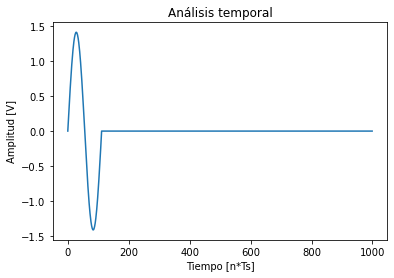

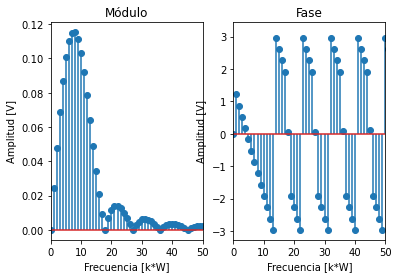

In [94]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['$\dfrac{E_T}{9} = 0.1111$', '1/9 = 0.1111..', '9'])
tus_resultados.append([ '', '',''])



W = fs/N
fo = 9 * W
A = np.sqrt(2) # => Para potencia unitaria


t,f2 = mySignalGenerator ('sin',(fo, A), fs, N, (0, 0));

f2[int(N/fo):] = 0 # Esto es cantidad de muestras en un periodo. Ver ejemplo de que tenes N muestras en una senoidal de fo = 1, y vas agrandando fo, lo que va disminuyendo la cant de muestras por perido


k, Fk, kk, Fkk = mi_analizador(f2, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f2) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal") 
              

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Lo que sucedia en el caso del ejercicio 4a es que la potencia estaba normalizada, por ende no importaba la cantidad de ciclos que muestrearamos (siempre que sea una cantidad entera de ciclos) ya que la potencia va a dar 1. Al recortar la señal anterior y quedarnos con un único ciclo, la energía se recorta en la misma proporción, por ende la energía total de la señal es de $\dfrac{E_T}{9} = \dfrac{1}{9} = 0.1111$. Dado que estamos solicitando que la función <em>mi_analizador</em> nos devuelva una versión escalada de la transformada para que se respete que la potencia debe ser unitaria, no hace falta multiplicar por ningun factor.
</div>

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Por otro lado, el espectro de la nueva señal esta sufriendo el efecto del spectrum leakage dado que estamos muy cerca del extremo izquierdo del espectro. Por tal motivo vemos que la señal mantiene su energía total pero la energía en $f_o$ disminuye. También podemos observar dicho efecto ya que el máximo paso de estar en $n=9$ a estar en $n=8$.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,1/9 = 0.1111..,1/9 = 0.1111..,9
,,,
simulación,0.111111,0.0123456,8


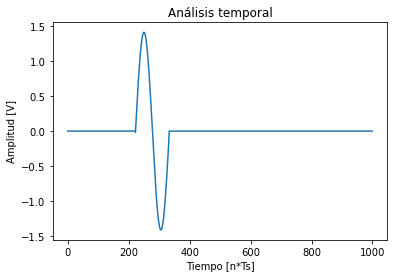

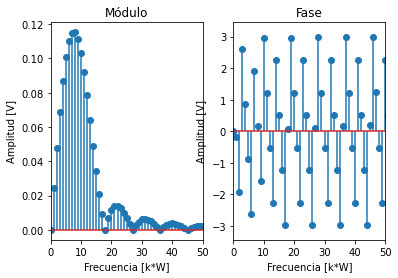

In [95]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['1/9 = 0.1111..', '1/9 = 0.1111..', '9'])
tus_resultados.append([ '', '',''])


W = fs/N
fo = 9 * W
A = np.sqrt(2) # => Para potencia unitaria

t,f3 = mySignalGenerator ('sin',(fo, A), fs, N, (0, 0));

f3[int((3*N) /fo):] = 0
f3[:int((2*N) /fo)] = 0

k, Fk, kk, Fkk = mi_analizador(f3, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f3) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal") 

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())



En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Lo único que hay cambiado en esta situación es que se ha generado un defasaje debido a que ahora el pulso rectangular con el que estamos convolucionando se ha desplazado temporalmente hacia la derecha, lo que se corresponde con una modificación en la fase.
</div>

#### Véase la propiedad de la DFT:

$f([n - n_0]) = F[k] \cdot W_N^{n_0 k}$

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$\left( \dfrac{1}{9} + \dfrac{1}{8} \right)$ = 0.236111..,1/9 = 0.1111..,8 o 9
,,,
simulación,0.236111,0.049029,9


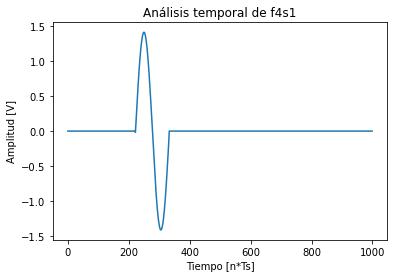

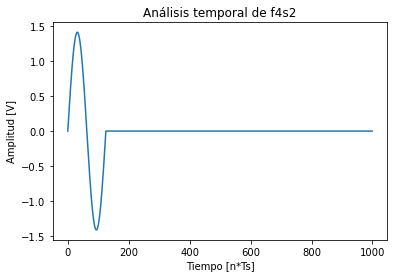

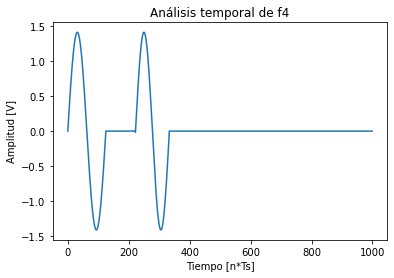

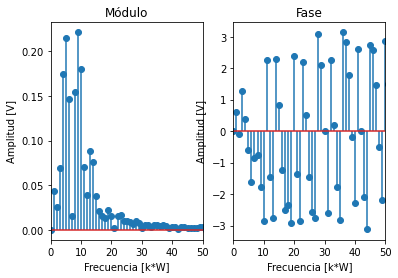

In [96]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['$\left( \dfrac{1}{9} + \dfrac{1}{8} \right)$ = 0.236111..', '1/9 = 0.1111..', '8 o 9'])
tus_resultados.append([ '', '',''])

W = fs/N

# Genero la senoidal de 9*W
fo1 = 9 * W
A1 = np.sqrt(2) # => Para potencia unitaria
t,f4s1 = mySignalGenerator ('sin',(fo1, A1), fs, N, (0, 0));

f4s1[int((3*N) /fo1):] = 0
f4s1[:int((2*N) /fo1)] = 0

fig, axs = plt.subplots(1)
                      
axs.plot(f4s1) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f4s1") 

# Genero la senoidal de 9*W
fo2 = 8 * W
A2 = np.sqrt(2) # => Para potencia unitaria
t,f4s2 = mySignalGenerator ('sin',(fo2, A2), fs, N, (0, 0));

f4s2[int(N /fo2):] = 0

fig, axs = plt.subplots(1)
                      
axs.plot(f4s2) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f4s2") 

# Genero la señal de interés para este ejercicio
f4 = f4s1 + f4s2

# Analizo
k, Fk, kk, Fkk = mi_analizador(f4, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f4) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f4") 

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Es muy dificil hacer este análisis con esa resolución espectral. Para aumentar la resolución vamos a hacer un poco de zero padding.
</div>

Text(0.5, 1.0, 'Fase')

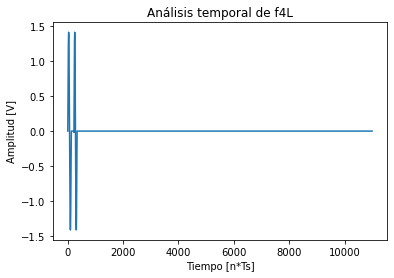

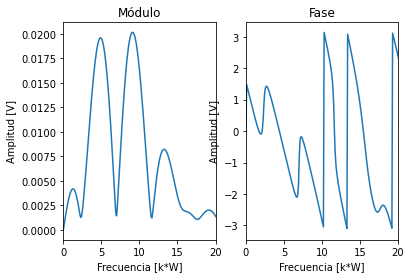

In [97]:
f4L = np.pad(f4, (0, int(10*N)), mode='constant', constant_values = (0,0))    #Add zero padding
# Analizo
k, Fk, kk, Fkk = mi_analizador(f4L, int(N + 10*N), W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

W = fs/(int(N + 10*N))

fig, axs = plt.subplots(1)
                      
axs.plot(f4L) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f4L") 

fig, axs = plt.subplots(1,2)
                      
axs[0].plot(kk* W, np.abs(Fkk))
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,20)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].plot(kk* W, np.angle(Fkk))
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,20)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

<div class="alert alert-block alert-warning">
<b>Nota:</b> En este caso deberíamos observar dos picos de igual amplitud, uno centrado en 8 y el otro en 9. El problema con el que nos encontramos es que al estar ambos valores tan cercanos entre si y tan cercanos al extremo del espectro, el alias genera una distorsión tal que es dificil de observar dicho fenomeno. Aparte, como podemos ver en la fase, a la altura del valor $k.W = 7$ tenemos un cambio brusco en la fase, que se traduce en la cancelación de dicha componente en el valor absoluto.
    
   Para visualizar que esto es así, voy a generar una nueva señal donde ambas frecuencias se van a encontrar en el medio de la banda digital.
</div>

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$\left( \dfrac{1}{250} + \dfrac{1}{251} \right) = 7.98.10^{-3}$,$1/250 = 4.10^{-3}$,250
,,,
simulación,0.00800268,9.5664e-09,249


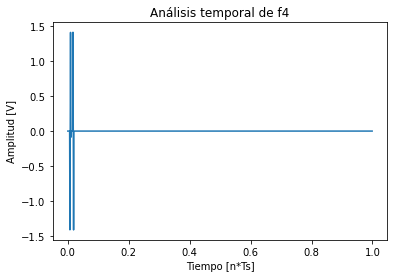

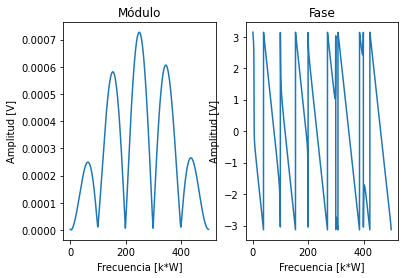

In [98]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['$\left( \dfrac{1}{250} + \dfrac{1}{251} \right) = 7.98.10^{-3}$', '$1/250 = 4.10^{-3}$', '250'])
tus_resultados.append([ '', '',''])

W = fs/N

# Genero la senoidal de 9*W
fo1 = 250 * W
A1 = np.sqrt(2) # => Para potencia unitaria
t,f4s1 = mySignalGenerator ('sin',(fo1, A1), fs, N, (0, 0));

f4s1[int((5*N) /fo1):] = 0
f4s1[:int((4*N) /fo1)] = 0

# Genero la senoidal de 9*W
fo2 = 251 * W
A2 = np.sqrt(2) # => Para potencia unitaria
t,f4s2 = mySignalGenerator ('sin',(fo2, A2), fs, N, (0, 0));

f4s2[int((3*N) /fo2):] = 0
f4s2[:int((2*N) /fo2)] = 0

# Genero la señal de interés para este ejercicio
f4 = f4s1 + f4s2

# Analizo
k, Fk, kk, Fkk = mi_analizador(f4, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(t,f4) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f4") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])



df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])


f4L = np.pad(f4, (0, int(10*N)), mode='constant', constant_values = (0,0))    #Add zero padding
# Analizo
k, Fk, kk, Fkk = mi_analizador(f4L, int(N + 10*N), W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

W = fs/(int(N + 10*N))

fig, axs = plt.subplots(1,2)
                      
axs[0].plot(kk* W, np.abs(Fkk))
axs[0].set_xlabel('Frecuencia [k*W]') 
#axs[0].set_xlim(0,20)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].plot(kk* W, np.angle(Fkk))
axs[1].set_xlabel('Frecuencia [k*W]')
#axs[1].set_xlim(0,20)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 
    
HTML(df.to_html())

<div class="alert alert-block alert-warning">
<b>Nota:</b> No se porque difiere tanto la energía en $f_0$.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$\left( \dfrac{1}{9} + \dfrac{1}{8} \right)$ = 0.236111..,1/9 = 0.1111..,8 o 9
,,,
simulación,0.236111,0.0157393,8


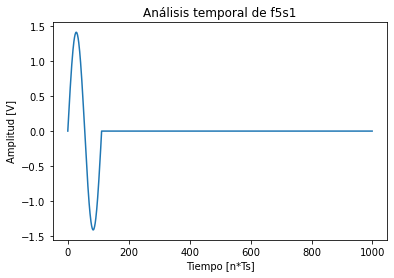

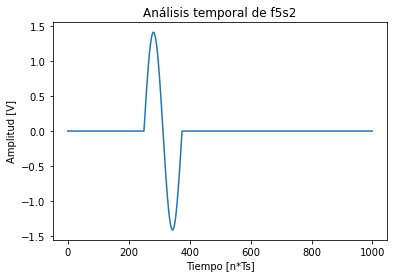

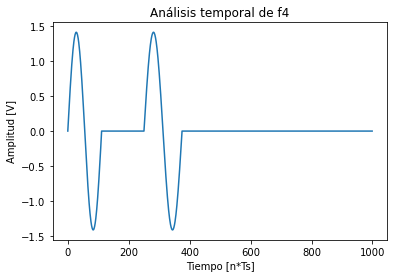

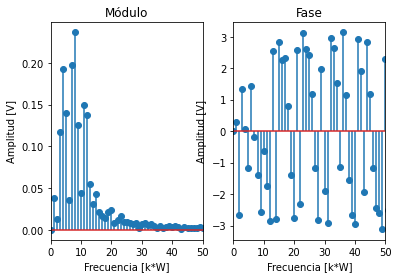

In [99]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['$\left( \dfrac{1}{9} + \dfrac{1}{8} \right)$ = 0.236111..', '1/9 = 0.1111..', '8 o 9'])
tus_resultados.append([ '', '',''])

W = fs/N

# Genero la senoidal de 9*W
fo1 = 9 * W
A = np.sqrt(2) # => Para potencia unitaria
t,f5s1 = mySignalGenerator ('sin',(fo1, A), fs, N, (0, 0));

f5s1[int(N /fo1):] = 0   

fig, axs = plt.subplots(1)
                      
axs.plot(f5s1) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f5s1") 

# Genero la senoidal de 9*W
fo2 = 8 * W
A = np.sqrt(2) # => Para potencia unitaria
t,f5s2 = mySignalGenerator ('sin',(fo2, A), fs, N, (0, 0));


f5s2[int((3*N) /fo2):] = 0
f5s2[:int((2*N) /fo2)] = 0

fig, axs = plt.subplots(1)
                      
axs.plot(f5s2) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f5s2") 

# Genero la señal de interés para este ejercicio
f5 = f5s1 + f5s2

# Analizo
k, Fk, kk, Fkk = mi_analizador(f5, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f5) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f4") 

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())


Text(0.5, 1.0, 'Fase')

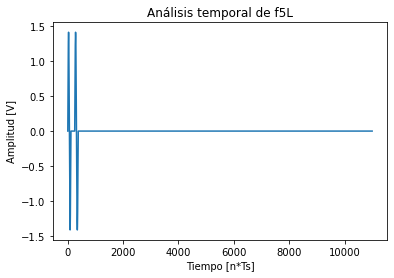

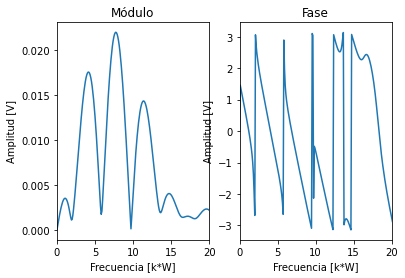

In [100]:
f5L = np.pad(f5, (0, int(10*N)), mode='constant', constant_values = (0,0))    #Add zero padding
# Analizo
W = fs/(int(N + 10*N))
k, Fk, kk, Fkk = mi_analizador(f5L, int(N + 10*N), W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.



fig, axs = plt.subplots(1)
                      
axs.plot(f5L) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f5L") 

fig, axs = plt.subplots(1,2)
                      
axs[0].plot(kk* W, np.abs(Fkk))
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,20)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].plot(kk* W, np.angle(Fkk))
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,20)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se modifica el espectro con el caso anterior. Como podemos observar, el módulo presenta cierta semejanza con lo expuesto en el útimo caso donde pusimos a los pulsos en el medio de la banda digital. Podemos ver que ahora el cambio brusco de fase ocurrene $10Hz$, por lo que tenemos un cero en el módulo en dicho valor. También vemos que los picos tienen distinta amplitud, a causa del alias.
</div>

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El análisis espectral resulta útil pero no permite dicernir entre los dos casos, y solo es posible llegar a conclusiones analizando casos similares en otros lugares del espectro.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$\dfrac{3\cdot E_T}{9}$ = 0.3333..,3/9 = 0.3333..,9
,,,
simulación,0.333333,0.111111,9


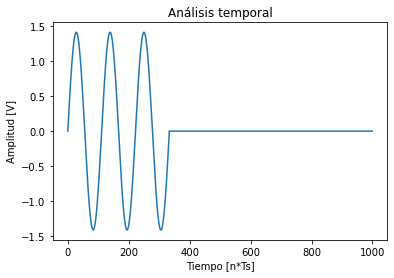

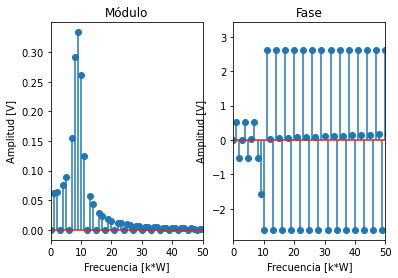

In [101]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['$\dfrac{3\cdot E_T}{9}$ = 0.3333..', '3/9 = 0.3333..', '9'])
tus_resultados.append([ '', '',''])


W = fs/N
fo6 = 9 * W
A = np.sqrt(2) # => Para potencia unitaria
t,f6 = mySignalGenerator ('sin',(fo6, A), fs, N, (0, 0));



f6[int((3*N)/fo6):] = 0


k, Fk, kk, Fkk = mi_analizador(f6, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f6) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal") 
              

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())

¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía se desparramo demasiado. Por tal motivo la componente $k = 9$ tiene solamente 0.1111 W/Hz. El problema se ve claramente en la fase. Mientras que en los casos con todos los ciclos y con un único ciclo la fase se mantenia periódica, en este caso vemos un fuerte cambio en la misma. Nuevamente, a este efecto se le debe sumar el alias ocasionado por encontrarnos en el extremo izquierdo del espectro.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$\dfrac{1^2/2 + 5^2/2 + 3^2/2}{9}$ = 1.9444..,35/18 = 1.9444..,9
,,,
simulación,1.94444,0.499997,9


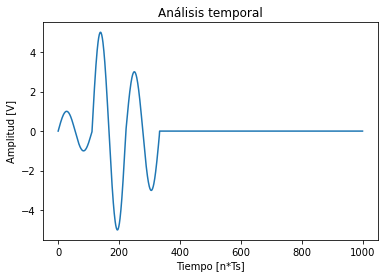

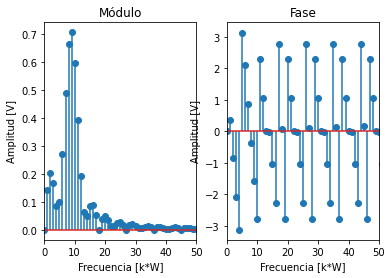

In [117]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['$\dfrac{1^2/2 + 5^2/2 + 3^2/2}{9}$ = 1.9444..', '35/18 = 1.9444..', '9'])
tus_resultados.append([ '', '',''])

W = fs/N

# Con amplitud 1
fo7s1 = 9 * W
A = 1
t,f7s1 = mySignalGenerator ('sin',(fo7s1, A), fs, N, (0, 0));
f7s1[int(N/fo7s1):] = 0
#fig, axs = plt.subplots(1)             
#axs.plot(f7s1) 
#axs.set_xlabel('Tiempo [n*Ts]')  
#axs.set_ylabel('Amplitud [V]')  
#axs.set_title("Análisis temporal de f7s1") 

# Con amplitud 5
fo7s2 = 9 * W
A = 5
t,f7s2 = mySignalGenerator ('sin',(fo7s2, A), fs, N, (0, 0));
f7s2[int((2*N)/fo7s2):] = 0
f7s2[:int(N/fo7s2)] = 0
#fig, axs = plt.subplots(1)                      
#axs.plot(f7s2) 
#axs.set_xlabel('Tiempo [n*Ts]')  
#axs.set_ylabel('Amplitud [V]')  
#axs.set_title("Análisis temporal de f7s2") 

# Con amplitud 3
fo7s3 = 9 * W
A = 3
t,f7s3 = mySignalGenerator ('sin',(fo7s3, A), fs, N, (0, 0));
f7s3[int((3*N)/fo7s3):] = 0
f7s3[:int((2*N)/fo7s3)] = 0
#fig, axs = plt.subplots(1)               
#axs.plot(f7s3) 
#axs.set_xlabel('Tiempo [n*Ts]')  
#axs.set_ylabel('Amplitud [V]')  
#axs.set_title("Análisis temporal de f7s3") 

# Genero la señal importante
f7 = f7s1 + f7s2 + f7s3


k, Fk, kk, Fkk = mi_analizador(f7, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f7) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal") 
              

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())


<div class="alert alert-block alert-success">
<b>Nota:</b> Dado que la función <em>mi_analizador</em> devuelve el espectro normalizado para mostrar la potencia unitaria (si $A = \sqrt{2}$), entonces podemos deducir los valores de energía a partir de la fórmula $P = \dfrac{A^2}{2}$. Para este caso particular, distinguiendo que estas son señales de potencia y no de energía, $P = \dfrac{1^2/2 + 5^2/2 + 3^2/2}{9} = 1.9444..$.
</div>

¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En este caso estamos superponiendo distintas señales de misma frecuencia fundamental. Esto implica que en $f_0$ vamos a tener la mayor energía. Como podemos observar, los valores calculados nos muestran que la energía en dicho bin no es la misma que supusimos, lo que implica que existe un desparramo. Por otra parte, podemos observar el efecto de la ventana rectangular actuando sobre la señal, que hace aparecer al kernel de Dirichlet.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,Ver fórmula abajo = 5.8333,35/6 = 5.8333,9
,,,
simulación,5.83332,4.5,9


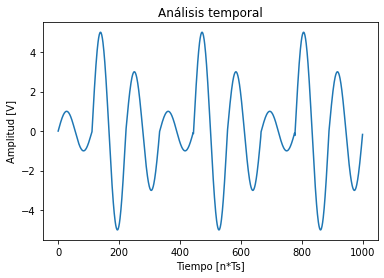

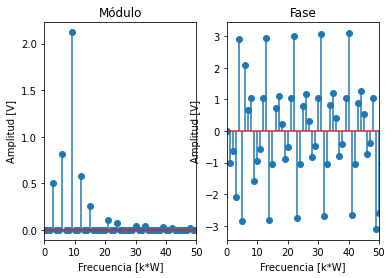

In [118]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['Ver fórmula abajo = 5.8333', '35/6 = 5.8333', '9'])
tus_resultados.append([ '', '',''])

W = fs/N
fo8 = 9 * W

# Con amplitud 1
A = 1
t,f8s1 = mySignalGenerator ('sin',(fo8, A), fs, N, (0, 0));
f8s1[int(N/fo8):int((3*N)/fo8)] = 0
f8s1[int((4*N)/fo8):int((6*N)/fo8)] = 0
f8s1[int((7*N)/fo8):int((9*N)/fo8)] = 0
#fig, axs = plt.subplots(1)             
#axs.plot(f8s1) 
#axs.set_xlabel('Tiempo [n*Ts]')  
#axs.set_ylabel('Amplitud [V]')  
#axs.set_title("Análisis temporal de f7s1") 

# Con amplitud 5
A = 5
t,f8s2 = mySignalGenerator ('sin',(fo8, A), fs, N, (0, 0));
f8s2[:int(N/fo8)] = 0
f8s2[int((2*N)/fo8):int((4*N)/fo8)] = 0
f8s2[int((5*N)/fo8):int((7*N)/fo8)] = 0
f8s2[int((N*8)/fo8):] = 0
#fig, axs = plt.subplots(1)                      
#axs.plot(f8s2) 
#axs.set_xlabel('Tiempo [n*Ts]')  
#axs.set_ylabel('Amplitud [V]')  
#axs.set_title("Análisis temporal de f7s2") 

# Con amplitud 3
A = 3
t,f8s3 = mySignalGenerator ('sin',(fo8, A), fs, N, (0, 0));
f8s3[:int((N*2)/fo8)] = 0
f8s3[int((3*N)/fo8):int((5*N)/fo8)] = 0
f8s3[int((6*N)/fo8):int((8*N)/fo8)] = 0
#fig, axs = plt.subplots(1)               
#axs.plot(f8s3) 
#axs.set_xlabel('Tiempo [n*Ts]')  
#axs.set_ylabel('Amplitud [V]')  
#axs.set_title("Análisis temporal de f7s3") 

# Genero la señal importante
f8 = f8s1 + f8s2 + f8s3


k, Fk, kk, Fkk = mi_analizador(f8, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f8) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal") 
              

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
    
HTML(df.to_html())


<div class="alert alert-block alert-success">
<b>Fórmula:</b> $3 \cdot \dfrac{\dfrac{1^2}{2} + \dfrac{5^2}{2} + \dfrac{3^2}{2}}{9} = 5.8333$ 
</div>



¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En esta situación nuevamente estamos superponiendo señales de la misma frecuencia fundamental. A diferencia del caso anterior, la ausencia de la ventana rectangular nos permite observar una menor densidad de puntos formando el kernel de dirichlet. También vemos que existe desparramo, por lo que la energía que habíamos supuesto no aparece en la simulación (aunque se respeta que esta es mayor que la del punto anterior, por contener más energía la última señal).
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

0.11111090201345414


,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,$\dfrac{2\cdot E_T}{9}$ = 0.2222..,2/9 = 0.2222..,9
,,,
simulación,0.111111,9.7579e-13,5


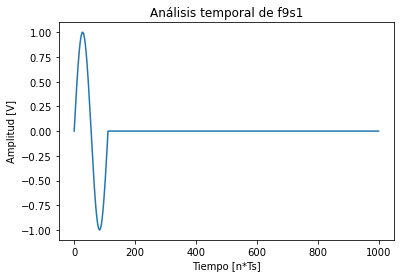

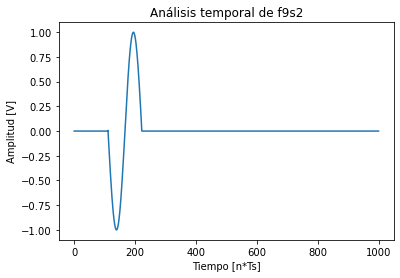

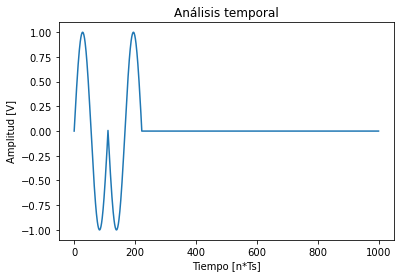

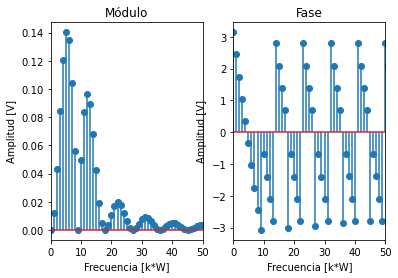

In [123]:
#######################################
# Tu simulación que genere resultados #
#######################################
# Inicializamos las variables donde vamos a almacenar los datos :D
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                   [ '', '','']
                 ]
tus_resultados.append(['$\dfrac{2\cdot E_T}{9}$ = 0.2222..', '2/9 = 0.2222..', '9'])
tus_resultados.append([ '', '',''])

W = fs/N
fo9 = 9 * W

# Con fase 0
phi = 0
A = 1
t,f9s1 = mySignalGenerator ('sin',(fo9, A), fs, N, (phi, 0));
f9s1[int(N/fo9):] = 0
fig, axs = plt.subplots(1)             
axs.plot(f9s1) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f9s1") 

# Con fase pi
phi = np.pi
A = 1
t,f9s2 = mySignalGenerator ('sin',(fo9, A), fs, N, (phi, 0));
f9s2[:int(N/fo7s2)] = 0
f9s2[int((2*N)/fo7s2):] = 0
fig, axs = plt.subplots(1)             
axs.plot(f9s2) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal de f9s2") 

# Genero la señal importante
f9 = f9s1 + f9s2 

k, Fk, kk, Fkk = mi_analizador(f9, N, W, escala = 'p'); # Nota: Esto devuelve la señal ya cumpliendo potencia unitaria.

fig, axs = plt.subplots(1)
                      
axs.plot(f9) 
axs.set_xlabel('Tiempo [n*Ts]')  
axs.set_ylabel('Amplitud [V]')  
axs.set_title("Análisis temporal") 
              

fig, axs = plt.subplots(1,2)
                      
axs[0].stem(kk* W, np.abs(Fkk), use_line_collection = True)
axs[0].set_xlabel('Frecuencia [k*W]') 
axs[0].set_xlim(0,50)
axs[0].set_ylabel('Amplitud [V]')  
axs[0].set_title("Módulo") 

axs[1].stem(kk* W, np.angle(Fkk), use_line_collection = True)
axs[1].set_xlabel('Frecuencia [k*W]')
axs[1].set_xlim(0,50)
axs[1].set_ylabel('Amplitud [V]')  
axs[1].set_title("Fase") 

tus_resultados.append([ (np.sum(np.abs(Fkk)**2)    ), 
                        (np.abs(Fkk[int(fo)])**2    ),
                        (np.argmax(np.abs(Fkk)**2)  )   
                      ])




df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
    
print(np.mean(f9**2))
    
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En $f_0$ la energía es nula debido a la discontinuidad en el punto. Esto genera un cambio brusco en la fase, lo que se termina expresando como una fuerte distribución de la energía en ese punto hacia los bins adyacentes.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Depende. Hay algunos casos donde es fiable utilizar el análisis espectral como herramienta. La cuestión está en saber discernir en que caso hay que interpretar qué cosa y en qué forma. Ya sabemos que la energía total se mantiene en la mayor parte de las situaciones, con la salvedad del último caso donde la energía total da la mitad. En cuanto a la distribución de las componentes espectrales, sabemos que a medida que nos acercamos a los extremos de la banda digital vamos a sufrir efectos de alias. A esto debemos sumarle los efectos generados por cambios bruscos en las señales de entrada.
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.0)</b> 
Diseñar una función para el ADC.
</div>

In [2]:
##############
# Tu función #
##############




<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

In [105]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

In [106]:
#####################################
# Tu simulación que genere gráficas #
#####################################


¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [107]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,,,
8 bits,,,
16 bits,,,


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [108]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                   ['', '', ''], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,,,
8 bits,,,
16 bits,,,


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>